In [4]:
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [5]:
# Dependancies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# Path to csv

ride_csv = "./ride_data.csv"
city_csv = "./city_data.csv"

In [7]:
# Reading csvs
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [8]:
city_df = city_df.drop_duplicates('city')
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [9]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,1/16/2016 13:49,38.35,5.400000e+12
1,South Roy,1/02/2016 18:42,17.49,4.040000e+12
2,Wiseborough,1/21/2016 17:35,44.18,3.650000e+12
3,Spencertown,7/31/2016 14:53,6.87,2.240000e+12
4,Nguyenbury,7/09/2016 4:42,6.28,1.540000e+12


In [10]:
#merging two dataFrames
merged_df = city_df.merge(ride_df, on = 'city')
merged_df = merged_df[["city","date","fare","ride_id","driver_count","type"]] # <---this is to get the desire order of columns
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,8/19/2016 4:27,5.51,6.250000e+12,63,Urban
1,Kelseyland,4/17/2016 6:59,5.54,7.470000e+12,63,Urban
2,Kelseyland,5/04/2016 15:06,30.54,2.140000e+12,63,Urban
3,Kelseyland,1/25/2016 20:44,12.08,1.900000e+12,63,Urban
4,Kelseyland,8/09/2016 18:19,17.91,8.780000e+12,63,Urban


In [11]:
# Average Fare ($) Per City
# data.groupby(['col1', 'col2'])['col3'].mean()
avg_fare = merged_df.groupby(['city', 'type', 'driver_count']).fare.mean()
avg_fare.head()

city          type      driver_count
Alvarezhaven  Urban     21              23.928710
Alyssaberg    Urban     67              20.609615
Anitamouth    Suburban  16              37.315556
Antoniomouth  Urban     21              23.625000
Aprilchester  Urban     49              21.981579
Name: fare, dtype: float64

In [12]:
#V# Total Number of Rides Per City
ridesPerCity = merged_df.groupby(['city', 'type', 'driver_count']).ride_id.count()
ridesPerCity.head()

city          type      driver_count
Alvarezhaven  Urban     21              31
Alyssaberg    Urban     67              26
Anitamouth    Suburban  16               9
Antoniomouth  Urban     21              22
Aprilchester  Urban     49              19
Name: ride_id, dtype: int64

In [13]:
city_rides_df = pd.DataFrame({
    "Average Fare": avg_fare,
    "Number of Rides": ridesPerCity
})

city_rides_df.reset_index(level = ['city', 'type', 'driver_count'], inplace = True)
city_rides_df.head()

,city,type,driver_count,Average Fare,Number of Rides
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


In [14]:
# Creating seperate DataFrames for "type" : Urban, Subarba and Rural using df above

urban_df = city_rides_df[(city_rides_df.type == 'Urban')]
suburban_df = city_rides_df[(city_rides_df.type == 'Suburban')]
rural_df = city_rides_df[(city_rides_df.type == 'Rural')]
urban_df.head()

,city,type,driver_count,Average Fare,Number of Rides
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19
5,Arnoldview,Urban,41,25.106452,31


In [15]:
suburban_df.head()

,city,type,driver_count,Average Fare,Number of Rides
2,Anitamouth,Suburban,16,37.315556,9
6,Campbellport,Suburban,26,33.711333,15
7,Carrollbury,Suburban,4,36.606000,10
9,Clarkstad,Suburban,21,31.051667,12
10,Conwaymouth,Suburban,18,34.591818,11


In [16]:
rural_df.head()

,city,type,driver_count,Average Fare,Number of Rides
17,East Leslie,Rural,9,33.660909,11
18,East Stephen,Rural,6,39.053000,10
19,East Troybury,Rural,3,33.244286,7
21,Erikport,Rural,3,30.043750,8
25,Hernandezshire,Rural,10,32.002222,9


In [17]:
#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
plt.suptitle('Pyber Ride Sharing Data')
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

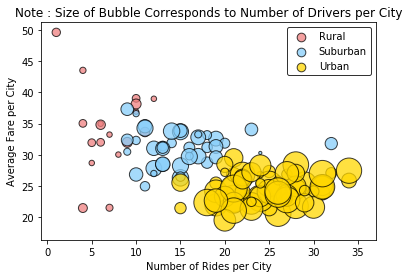

In [20]:
plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], s = rural_df['driver_count']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], s = suburban_df['driver_count']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], s = urban_df['driver_count']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()